In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
GA_Places = gpd.read_file("cb_2024_13_place_500k.shp")
print(GA_Places)

    STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID               NAME  \
0        13   84176  02405788  1600000US1384176  1384176          Woodstock   
1        13   41932  02404792  1600000US1341932  1341932             Jasper   
2        13   23480  02406387  1600000US1323480  1323480            Dooling   
3        13   06688  02403849  1600000US1306688  1306688          Bellville   
4        13   31292  02403659  1600000US1331292  1331292           Franklin   
..      ...     ...       ...               ...      ...                ...   
670      13   27736  02587035  1600000US1327736  1327736            Epworth   
671      13   57232  02407021  1600000US1357232  1357232           Oak Park   
672      13   59735  02710337  1600000US1359735  1359735  Peachtree Corners   
673      13   83084  02405748  1600000US1383084  1383084         Williamson   
674      13   28632  02402472  1600000US1328632  1328632           Fairview   

                   NAMELSAD STUSPS STATE_NAME LSAD 

In [3]:
city_name = GA_Places[['NAME']]
city_limit = GA_Places[['geometry']]
print(city_name, city_limit)

                  NAME
0            Woodstock
1               Jasper
2              Dooling
3            Bellville
4             Franklin
..                 ...
670            Epworth
671           Oak Park
672  Peachtree Corners
673         Williamson
674           Fairview

[675 rows x 1 columns]                                               geometry
0    POLYGON ((-84.56656 34.11357, -84.56196 34.112...
1    POLYGON ((-84.52171 34.50509, -84.52009 34.505...
2    POLYGON ((-83.9347 32.23497, -83.92616 32.2349...
3    POLYGON ((-81.98276 32.15995, -81.97259 32.159...
4    POLYGON ((-85.1159 33.28031, -85.11535 33.2834...
..                                                 ...
670  POLYGON ((-84.39032 34.95231, -84.38872 34.955...
671  POLYGON ((-82.3336 32.37897, -82.33282 32.3852...
672  POLYGON ((-84.27644 33.95778, -84.27519 33.958...
673  POLYGON ((-84.37416 33.17493, -84.36978 33.177...
674  POLYGON ((-85.319 34.93425, -85.31887 34.93506...

[675 rows x 1 columns]


<Axes: >

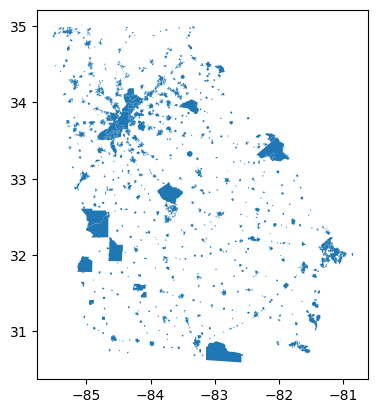

In [4]:
city_limit.plot()

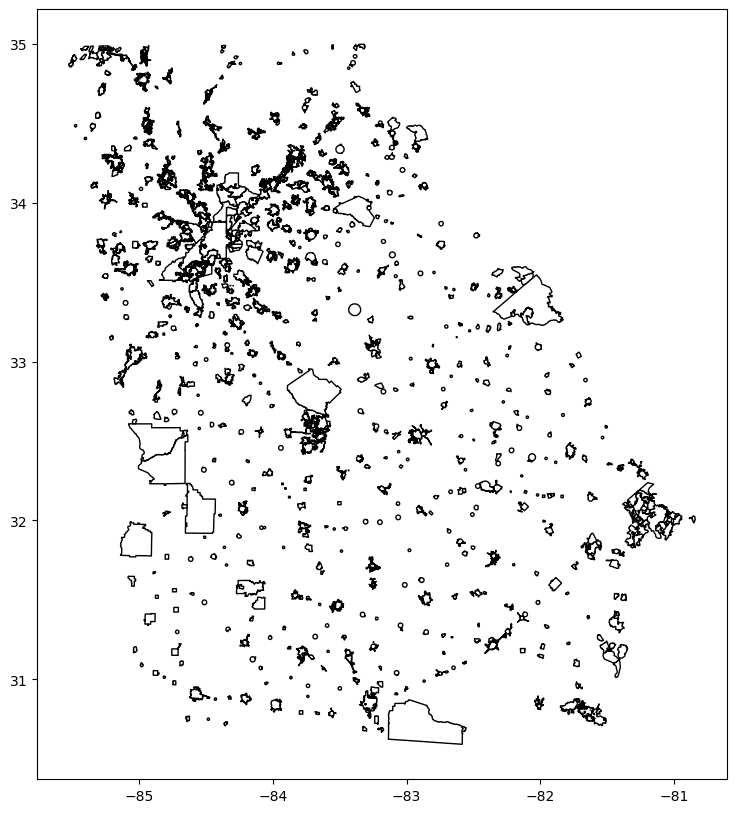

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
city_limit.plot(ax=ax, color='white', edgecolor='black')
plt.show()

In [6]:
city_limit.area

C:\Users\alayn\AppData\Local\Temp\ipykernel_34068\701153236.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  city_limit.area


0      0.003328
1      0.002176
2      0.000115
3      0.000251
4      0.000837
         ...   
670    0.000263
671    0.001787
672    0.004107
673    0.000338
674    0.001921
Length: 675, dtype: float64

In [7]:
city_limit.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [8]:
city_limit_proj = city_limit.to_crs('EPSG:26916')

In [9]:
city_limit_proj.area

0      3.407954e+07
1      2.218695e+07
2      1.203074e+06
3      2.632912e+06
4      8.650673e+06
           ...     
670    2.668016e+06
671    1.872292e+07
672    4.213537e+07
673    3.495384e+06
674    1.946552e+07
Length: 675, dtype: float64

In [10]:
city_MBC = city_limit_proj.minimum_bounding_circle()

<Axes: >

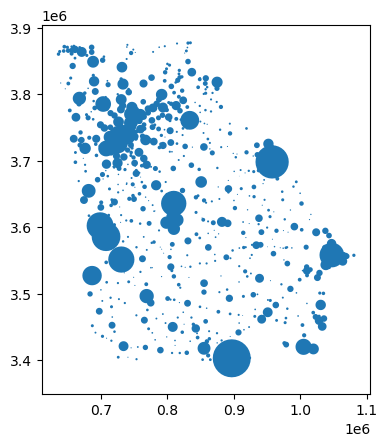

In [11]:
city_MBC.plot()

In [12]:
city_MBC.area

0      1.080311e+08
1      2.185551e+08
2      1.881082e+06
3      4.070500e+06
4      1.321506e+07
           ...     
670    4.598864e+06
671    5.969766e+07
672    9.646598e+07
673    6.932252e+06
674    4.174732e+07
Length: 675, dtype: float64

In [13]:
city_ratio = city_limit_proj.area/city_MBC.area
print(city_ratio)

0      0.315460
1      0.101517
2      0.639565
3      0.646828
4      0.654607
         ...   
670    0.580147
671    0.313629
672    0.436790
673    0.504221
674    0.466270
Length: 675, dtype: float64


In [14]:
city_ratio.median()

np.float64(0.453569913452579)

In [15]:
somewhat_circle_city_mask = city_ratio > 0.65
somewhat_circle_city = city_ratio[somewhat_circle_city_mask]
somewhat_circle_city

4      0.654607
6      0.929710
7      0.691804
8      0.897337
9      0.896903
         ...   
586    0.950558
602    0.715148
607    0.657102
612    0.722879
642    0.953106
Length: 127, dtype: float64

In [16]:
circle_cities = city_limit.iloc[somewhat_circle_city.index]
circle_cities

,geometry
4,"POLYGON ((-85.1159 33.28031, -85.11535 33.2834..."
6,"POLYGON ((-84.56018 32.57976, -84.55947 32.582..."
7,"POLYGON ((-82.58343 32.18482, -82.57982 32.198..."
8,"POLYGON ((-84.52024 31.89483, -84.5179 31.8995..."
9,"POLYGON ((-82.49476 32.08222, -82.4943 32.0844..."
...,...
586,"POLYGON ((-83.07751 32.10632, -83.07634 32.110..."
602,"POLYGON ((-83.42386 33.86532, -83.42208 33.868..."
607,"POLYGON ((-84.76182 33.209, -84.76133 33.21246..."
612,"POLYGON ((-84.27246 31.90096, -84.26996 31.901..."


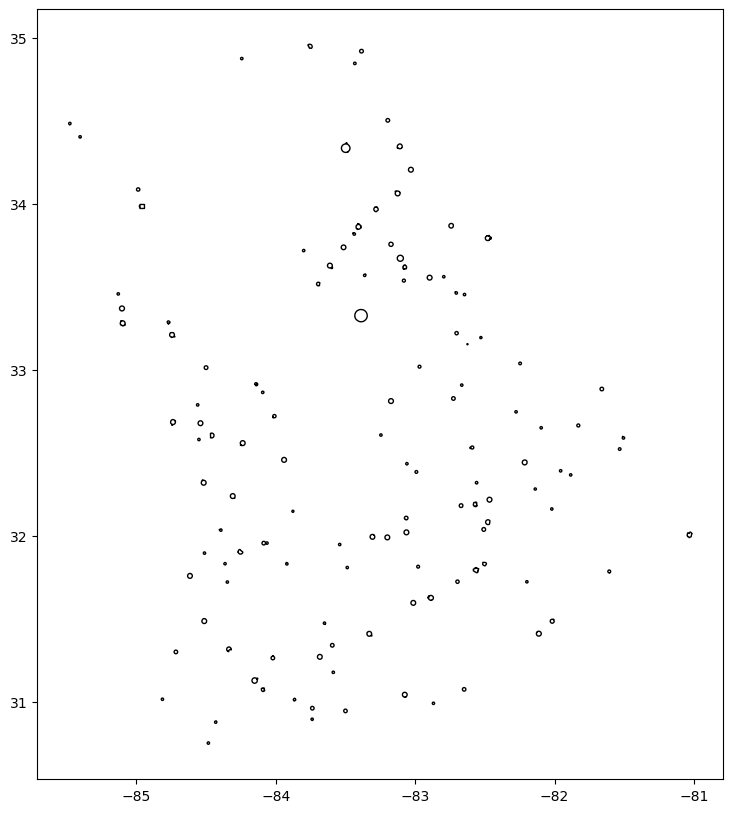

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
circle_cities.plot(ax=ax, color='white', edgecolor='black')
plt.show()

In [18]:
circle_cities_names = city_name.iloc[circle_cities.index]
circle_cities_names

,NAME
4,Franklin
6,Geneva
7,Ailey
8,Parrott
9,Alston
...,...
586,Chauncey
602,Watkinsville
607,Luthersville
612,Smithville
